In [ ]:
import numpy as np


class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
              # what does zip function do?
              # languages = ['Java', 'Python', 'JavaScript']
              # versions = [14, 3, 6]
              # result = zip(languages, versions)
              # print(list(result))
              # Output: [('Java', 14), ('Python', 3), ('JavaScript', 6)]
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

    def demonstrate_predict(self, X):
        """Return class label after unit step"""
        return np.where(self.demonstrate_net_input(X) >= 0.0, 1, 0)

    def demonstrate_net_input(self, X):
        print('weight list',self.w_)
        print('bias',self.b_)
        return np.dot(X, self.w_) + self.b_
        
    def demonstrate_fit(self, X, y):
      rgen = np.random.RandomState(self.random_state)
      self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
      self.b_ = np.float_(0.)
        
      self.errors_ = []

      for _ in range(self.n_iter):
        errors = 0
        print('zip(X,y): ', zip(X,y))
        for xi, target in zip(X, y):
              # what does zip function do?
              # languages = ['Java', 'Python', 'JavaScript']
              # versions = [14, 3, 6]
              # result = zip(languages, versions)
              # print(list(result))
              # Output: [('Java', 14), ('Python', 3), ('JavaScript', 6)]
                print('xi: ', xi)
                print('target: ', target)
                
                print('self.predict(xi): ', self.demonstrate_predict(xi))
                

                update = self.eta * (target - self.demonstrate_predict(xi))

                print('update: ', update)
                print('-----------------------')
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
        self.errors_.append(errors)
        return self

In [ ]:
#toy dataset for demonstration
import pandas as pd
toyNpArray = pd.DataFrame.from_dict({'rating': [4.2, 4.5, 2.1, 1.9], 'difficulty': [2, 2.5, 4, 4.5], 'takeOrNot' : [1,1,0,0]})

In [ ]:
toyNpArray

,rating,difficulty,takeOrNot
0,4.2,2.0,1
1,4.5,2.5,1
2,2.1,4.0,0
3,1.9,4.5,0


In [ ]:
toyPerceptron = Perceptron(eta=0.03)
toyX = toyNpArray.iloc[0:4,0:2].values
toyY = toyNpArray.iloc[0:4,2].values
toyPerceptron.demonstrate_fit(toyX, toyY)

zip(X,y):  <zip object at 0x7f681e7b49c0>
xi:  [4.2 2. ]
target:  1
weight list [ 0.01624345 -0.00611756]
bias 0.0
self.predict(xi):  1
weight list [ 0.01624345 -0.00611756]
bias 0.0
update:  0.0
-----------------------
xi:  [4.5 2.5]
target:  1
weight list [ 0.01624345 -0.00611756]
bias 0.0
self.predict(xi):  1
weight list [ 0.01624345 -0.00611756]
bias 0.0
update:  0.0
-----------------------
xi:  [2.1 4. ]
target:  0
weight list [ 0.01624345 -0.00611756]
bias 0.0
self.predict(xi):  1
weight list [ 0.01624345 -0.00611756]
bias 0.0
update:  -0.03
-----------------------
xi:  [1.9 4.5]
target:  0
weight list [-0.04675655 -0.12611756]
bias -0.03
self.predict(xi):  0
weight list [-0.04675655 -0.12611756]
bias -0.03
update:  0.0
-----------------------


In [ ]:
import os
import pandas as pd

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s,
                     header=None,
                     encoding='utf-8')
    

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [ ]:
#last five rows
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
#the whole data -> click the interactive table button to examine the dataset!
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# select setosa and versicolor

y = df.iloc[0:100, 4]



In [ ]:
# examine y
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
           ...       
95    Iris-versicolor
96    Iris-versicolor
97    Iris-versicolor
98    Iris-versicolor
99    Iris-versicolor
Name: 4, Length: 100, dtype: object

In [ ]:
# turn y into numpy arrays
y = y.values

In [ ]:
# examine y again
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [ ]:
# change y into array of 0s and 1s
y = np.where(y == 'Iris-setosa', 0, 1)

In [ ]:
#examine y again
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
# extract sepal length and petal length
X = df.iloc[0:100, [0, 2]]

In [ ]:
#examine X
X

,0,2
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
95,5.7,4.2
96,5.7,4.2
97,6.2,4.3
98,5.1,3.0


In [ ]:
# turn X into numpy arrays
X = df.iloc[0:100, [0, 2]].values

In [ ]:
#examine X again
X

array([[5.1, 1.4],
       [4.9, 1.4],
       [4.7, 1.3],
       [4.6, 1.5],
       [5. , 1.4],
       [5.4, 1.7],
       [4.6, 1.4],
       [5. , 1.5],
       [4.4, 1.4],
       [4.9, 1.5],
       [5.4, 1.5],
       [4.8, 1.6],
       [4.8, 1.4],
       [4.3, 1.1],
       [5.8, 1.2],
       [5.7, 1.5],
       [5.4, 1.3],
       [5.1, 1.4],
       [5.7, 1.7],
       [5.1, 1.5],
       [5.4, 1.7],
       [5.1, 1.5],
       [4.6, 1. ],
       [5.1, 1.7],
       [4.8, 1.9],
       [5. , 1.6],
       [5. , 1.6],
       [5.2, 1.5],
       [5.2, 1.4],
       [4.7, 1.6],
       [4.8, 1.6],
       [5.4, 1.5],
       [5.2, 1.5],
       [5.5, 1.4],
       [4.9, 1.5],
       [5. , 1.2],
       [5.5, 1.3],
       [4.9, 1.5],
       [4.4, 1.3],
       [5.1, 1.5],
       [5. , 1.3],
       [4.5, 1.3],
       [4.4, 1.3],
       [5. , 1.6],
       [5.1, 1.9],
       [4.8, 1.4],
       [5.1, 1.6],
       [4.6, 1.4],
       [5.3, 1.5],
       [5. , 1.4],
       [7. , 4.7],
       [6.4, 4.5],
       [6.9,

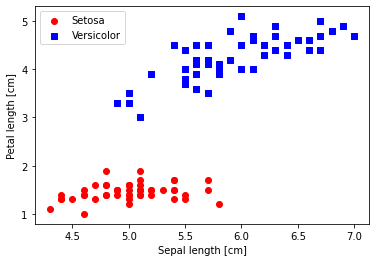

In [ ]:
# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='s', label='Versicolor')

plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

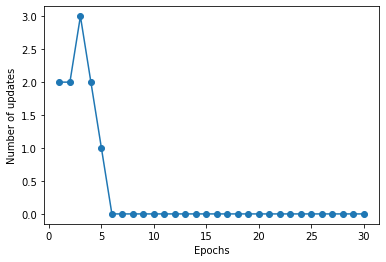

In [ ]:
# set perceptron, play with eta and n_iter a bit
ppn = Perceptron(eta=0.1, n_iter=30)

# train
ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')

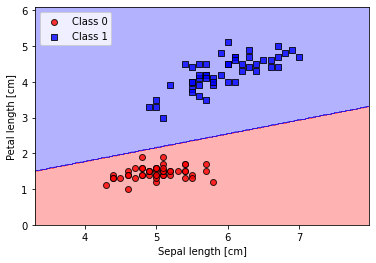

In [ ]:
# pass class as function argument
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')


#plt.savefig('images/02_08.png', dpi=300)
plt.show()